In [1]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

# Load the fine-tuned model
model = BlipForConditionalGeneration.from_pretrained("./fine_tuned_blip")

# Load the processor
processor = BlipProcessor.from_pretrained("./fine_tuned_blip")

# Set model to evaluation mode
model.eval()


BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [6]:
# Load an image
image_path = "C:\\Users\\ACER\\OneDrive\\Desktop\\SmartCaption\\flickr30k\\10010052.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")

# Process the image
inputs = processor(images=image, return_tensors="pt")

# Move inputs to CUDA if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
inputs = {k: v.to(device) for k, v in inputs.items()}


In [7]:
# Generate caption
with torch.no_grad():
    output = model.generate(**inputs)

# Decode the output
caption = processor.tokenizer.decode(output[0], skip_special_tokens=True)
print("Generated Caption:", caption)


C:\Users\ACER\OneDrive\Desktop\SmartCaption\myenv310\lib\site-packages\transformers\generation\utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Caption: a young woman in a blue shirt is talking on a cellphone while standing in a parking lot


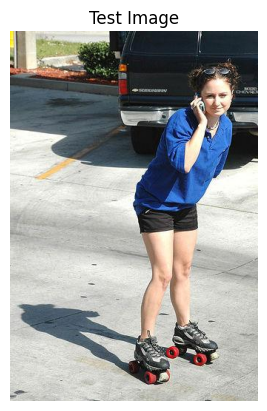

In [8]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.title("Test Image")
plt.show()
